### Imports

In [81]:
import numpy as np

# Add models here
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# Sklearn imports for processing and evaluation
from sklearn.decomposition import PCA
from sklearn.metrics import median_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Plotting
from matplotlib import pyplot as plt

# Misc
import time
from tqdm import tqdm

### Load Data

In [2]:
x_train = np.loadtxt("./X_train.txt")
y_train = np.loadtxt("./y_train.txt")

x_test = np.loadtxt("./X_test.txt")
y_test = np.loadtxt("./y_test.txt")

### Combine Data

In [10]:
combined_x = np.concatenate((x_train, x_test))
combined_y = np.concatenate((y_train, y_test))

assert combined_x.shape[0] == x_train.shape[0] + x_test.shape[0]
assert combined_y.shape[0] == y_train.shape[0] + y_test.shape[0]

### Baseline model

#### Neural Network

In [89]:
def do_kfoldNN(x_data, y_data, features='all', folds=10):
    start = time.time()
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        
        x = x_data[train_idx].astype('float32')
        n_features = x_data[train_idx].shape[1]
        k1 = transformed.shape[1]
        print(k1)
        model = Sequential()
        model.add(Dense(k1, activation='relu', kernel_initializer='he_normal', input_shape=(k1,)))
        model.add(Dense(384, activation='relu',  kernel_initializer='he_normal'))
        model.add(Dense(6,activation='softmax'))
        
        optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
        
        model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        print(transformed.shape, y_data[train_idx.shape])
        #raise
        print(np.unique(y_data[train_idx]))
        model.fit(transformed, y_data[train_idx], batch_size = 30, epochs = 5)
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        preds = model.predict(test_transform)
        #print(preds)
        #print(y_data[test_idx])
        loss, score = model.evaluate(test_transform, y_data[test_idx], verbose=0)
        #score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        fit_times.append(time.time() - start)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [90]:
#for i in range (0,len(combined_y)):
#    combined_y[i] = combined_y[i]-1

combined_y_mod = combined_y - 1
pred_accuracyNN, fit_timesNN = do_kfoldNN(combined_x, combined_y_mod, features=561)

scores_nn = np.mean(pred_accuracyNN)
scores_nn_std = np.std(pred_accuracyNN)
time_nn = np.mean(fit_timesNN)

print(f"The accuracy is {np.mean(scores_nn)*100:1.3f}% with a standard deviation of {scores_nn_std:1.3f}")
print(f"The time taken to complete the model is {time_nn:1.2f}s")

0it [00:00, ?it/s]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1539 - accuracy: 0.9441
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0525 - accuracy: 0.9839
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0180 - accuracy: 0.9936
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0164 - accuracy: 0.9959


1it [00:13, 13.54s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1543 - accuracy: 0.9416
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0496 - accuracy: 0.9858
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0236 - accuracy: 0.9916
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0094 - accuracy: 0.9976
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0030 - accuracy: 0.9992


2it [00:26, 13.43s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1434 - accuracy: 0.9451
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0364 - accuracy: 0.9878
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0235 - accuracy: 0.9918
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0225 - accuracy: 0.9946
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0038 - accuracy: 0.9989


3it [00:40, 13.35s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 8ms/step - loss: 0.1434 - accuracy: 0.9449
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0160 - accuracy: 0.9940
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0092 - accuracy: 0.9960
Epoch 5/5
309/309 [==============================] - 2s 8ms/step - loss: 0.0058 - accuracy: 0.9978


4it [01:02, 17.09s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1550 - accuracy: 0.9433
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0517 - accuracy: 0.9822
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0073 - accuracy: 0.9977
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0013 - accuracy: 0.9999


5it [01:16, 15.74s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1664 - accuracy: 0.9389
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0492 - accuracy: 0.9832
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0237 - accuracy: 0.9908
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0169 - accuracy: 0.9959
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0081 - accuracy: 0.9974


6it [01:29, 14.89s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1572 - accuracy: 0.9424
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0439 - accuracy: 0.9851
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0094 - accuracy: 0.9970
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0032 - accuracy: 0.9987


7it [01:42, 14.41s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1654 - accuracy: 0.9412
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0381 - accuracy: 0.9867
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0233 - accuracy: 0.9914
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0076 - accuracy: 0.9973


8it [02:05, 17.06s/it]

561
(9269, 561) 3.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1546 - accuracy: 0.9441
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0323 - accuracy: 0.9883
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0169 - accuracy: 0.9937
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0079 - accuracy: 0.9969
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0089 - accuracy: 0.9973


9it [02:19, 16.09s/it]

561
(9270, 561) 5.0
[0. 1. 2. 3. 4. 5.]
Epoch 1/5
309/309 [==============================] - 3s 7ms/step - loss: 0.1620 - accuracy: 0.9414
Epoch 2/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0463 - accuracy: 0.9837
Epoch 3/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0195 - accuracy: 0.9928
Epoch 4/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0100 - accuracy: 0.9961
Epoch 5/5
309/309 [==============================] - 2s 7ms/step - loss: 0.0072 - accuracy: 0.9971


10it [02:32, 15.30s/it]

561 FEATURES PREDICTION ACCURACY: 0.951 $\pm$ 0.022
The accuracy is 95.145% with a standard deviation of 0.022
The time taken to complete the model is 83.08s


#### Logistic Regression

In [82]:
# prepare the cross-validation procedure
t0 = time.time()
cv = KFold(n_splits=5)
# create model
model = LogisticRegression(multi_class='ovr', solver='liblinear')
# evaluate model
scaler = StandardScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
scores = cross_val_score(pipeline, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_lr = np.mean(scores)
scores_lr_std = np.std(scores)
print(f"The accuracy is {np.mean(scores_lr)*100:1.3f}% with a standard deviation of {np.std(scores_lr):1.3f}")
t1 = time.time()
t1 = time.time()
time_lg = t1 - t0
print(f"The time taken to complete the model is {time_lg:1.2f}s")

The accuracy is 96.029% with a standard deviation of 0.000
The time taken to complete the model is 62.09s


#### SVM Linear

In [84]:
tsvm_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = svm.SVC(kernel='linear', C=1)
# evaluate model
scaler = StandardScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
scores = cross_val_score(pipeline, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_svm_linear = np.mean(scores)
scores_svm_linear_std = np.std(scores)

print(f"The accuracy is {np.mean(scores_svm_linear)*100:1.3f}% with a standard deviation of {scores_svm_linear_std:1.3f}")
tsvm_1 = time.time()
time_svm_linear = tsvm_1 - tsvm_0
print(f"The time taken to complete the model is {time_svm_linear:1.2f}s")

The accuracy is 95.631% with a standard deviation of 0.016
The time taken to complete the model is 10.46s


#### SVM Poly

In [85]:
tsvm_poly_0 = time.time()
cv = KFold(n_splits=10)
# create model
model = svm.SVC(kernel='poly', C=1)
# evaluate model
scaler = StandardScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
scores = cross_val_score(pipeline, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_svm_poly = np.mean(scores)
scores_svm_poly_std = np.std(scores)

print(f"The accuracy is {scores_svm_poly*100:1.3f}% with a standard deviation of {scores_svm_poly_std:1.3f}")
tsvm_poly_1 = time.time()
time_svm_poly = tsvm_poly_1 - tsvm_poly_0
print(f"The time taken to complete the model is {time_svm_poly:1.2f}s")

The accuracy is 93.834% with a standard deviation of 0.022
The time taken to complete the model is 60.95s


#### Random Forest

In [86]:
trf_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = RandomForestClassifier()
# evaluate model
scaler = StandardScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
scores = cross_val_score(pipeline, combined_x, combined_y, scoring='accuracy', cv=cv)
scores_svm_poly = np.mean(scores)
scores_rf = np.mean(scores)
scores_rf_std = np.std(scores)

print(f"The accuracy is {scores_rf*100:1.3f}% with a standard deviation of {scores_rf_std:1.3f}")
trf_1 = time.time()
time_rf = trf_1 - trf_0
print(f"The time taken to complete the model is {time_rf:1.2f}s")

The accuracy is 93.145% with a standard deviation of 0.011
The time taken to complete the model is 78.11s


#### Gradient Boost

In [ ]:
tgb_0 = time.time()
cv = KFold(n_splits=5)
# create model
model = GradientBoostingClassifier()
# evaluate model
scaler = StandardScaler()
pipeline = Pipeline([('transformer', scaler), ('estimator', model)])
#scores = cross_val_score(pipeline, combined_x, combined_y, scoring='accuracy', cv=cv)
#scores_svm_poly = np.mean(scores)
#scores_gb = np.mean(scores)
#scores_gb_std = np.std(scores)

#print(f"The accuracy is {scores_gb*100:1.3f}% with a standard deviation of {scores_gb_std:1.3f}")
#tgb_1 = time.time()

#tgb_1 = time.time()
#time_gb = tgb_1 - tgb_0
#print(f"The time taken to complete the model is {time_gb:1.2f}s")

The accuracy is 94.233% with a standard deviation of 0.014
The time taken to complete the model is 3003.03s


#### Plots comparing accuracy and time to run the alogrithms

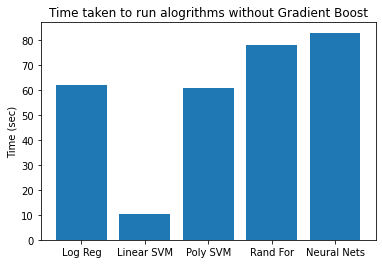

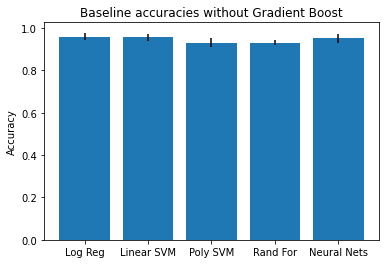

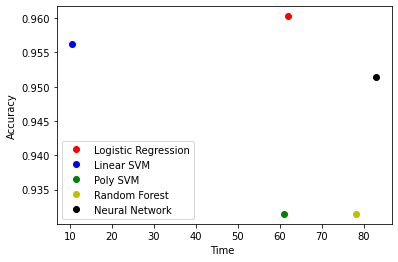

In [93]:
#run_time = np.array([time_lg, time_svm_linear, time_svm_poly, time_rf, time_nn, time_gb])
#accuracies =  np.array([scores_lr, scores_svm_linear, scores_svm_poly, scores_rf, scores_nn, scores_gb])
#accuracy_std = np.array([scores_lr_std, scores_svm_linear_std, scores_svm_poly_std, scores_rf_std, scores_nn_std, scores_gb_std])
#name_models = ['Log Reg', 'Linear SVM', 'Poly SVM','Rand For', 'Neural Nets', 'Gradient Boost']

name_model_wgb = ['Log Reg', 'Linear SVM', 'Poly SVM','Rand For', 'Neural Nets']
accuracies_wgb =  np.array([scores_lr, scores_svm_linear, scores_svm_poly, scores_rf, scores_nn])
accuracy_std_wgb = np.array([scores_lr_std, scores_svm_linear_std, scores_svm_poly_std, scores_rf_std, scores_nn_std])
run_time_wgb = np.array([time_lg, time_svm_linear, time_svm_poly, time_rf, time_nn])

#plt.figure
#plt.bar(name_models, run_time)
#plt.title('Time taken to run alogrithm')
#plt.ylabel('Time (sec)')
#plt.show()

plt.figure
plt.bar(name_model_wgb, run_time_wgb)
plt.title('Time taken to run alogrithms without Gradient Boost')
plt.ylabel('Time (sec)')
plt.show()

#plt.figure
#plt.bar(name_models, accuracies, yerr=accuracy_std)
#plt.title('Baseline accuracies of each alogrithm')
#plt.ylabel('Accuracy')
#plt.show()

plt.figure
plt.bar(name_model_wgb, accuracies_wgb, yerr=accuracy_std_wgb)
plt.title('Baseline accuracies without Gradient Boost')
plt.ylabel('Accuracy')
plt.show()

plt.plot(time_lg,scores_lr, 'ro', label = 'Logistic Regression')
plt.plot(time_svm_linear,scores_svm_linear, 'bo', label = 'Linear SVM')
plt.plot(time_svm_poly,scores_svm_poly, 'go', label = 'Poly SVM')
plt.plot(time_rf,scores_rf, 'yo', label = 'Random Forest')
plt.plot(time_nn,scores_nn, 'ko', label = 'Neural Network')
#plt.plot(time_gb,scores_gb, 'mo', label = 'Gradient Boost')
plt.xlabel('Time ')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Part 2
### Comparing feature selection and feature extraction

### Feature selection using probabilistic mutual information

In [94]:
def do_kfold_mutual_info(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do Mutual Information Feature Extraction
        features = x_data.shape[1] if(features == 'all') else features
        fs = SelectKBest(score_func=mutual_info_classif, k=features)
        fs.fit(x_data[train_idx], y_data[train_idx])
        x_train_fs = fs.transform(x_data[train_idx])
        x_test_fs = fs.transform(x_data[test_idx])

        # Standardize data
        scaler = StandardScaler().fit(x_train_fs)
        transformed = scaler.transform(x_train_fs)
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate

        preds = model.predict(scaler.transform(x_test_fs))
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

### Training for Different Number of Mutual information

In [ ]:
# Number of PCA Components
num_features = np.arange(5, 500, 20)

results = []
times = []
for features in num_features:
    print(features)
    pred_accuracy, fit_times = do_kfold_mutual_info(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

# Get means
ml_acc_mean = np.mean(results, axis=1)
ml_acc_stds = np.std(results, axis=1)
ml_time_mean = np.mean(times, axis=1)
ml_time_stds = np.std(times, axis=1)

np.save("./mi_results/svm_linear_results.npy", results)
np.save("./mi_results/svm_linear_time.npy", times)

5


10it [04:54, 29.42s/it]


5 FEATURES PREDICTION ACCURACY: 0.621 $\pm$ 0.087
25


10it [04:48, 28.82s/it]


25 FEATURES PREDICTION ACCURACY: 0.873 $\pm$ 0.047
45


10it [04:47, 28.71s/it]


45 FEATURES PREDICTION ACCURACY: 0.903 $\pm$ 0.031
65


10it [04:43, 28.39s/it]


65 FEATURES PREDICTION ACCURACY: 0.918 $\pm$ 0.032
85


10it [04:45, 28.51s/it]


85 FEATURES PREDICTION ACCURACY: 0.926 $\pm$ 0.031
105


10it [04:45, 28.58s/it]


105 FEATURES PREDICTION ACCURACY: 0.930 $\pm$ 0.031
125


10it [04:44, 28.48s/it]


125 FEATURES PREDICTION ACCURACY: 0.932 $\pm$ 0.028
145


10it [04:44, 28.43s/it]


145 FEATURES PREDICTION ACCURACY: 0.939 $\pm$ 0.026
165


10it [04:44, 28.48s/it]


165 FEATURES PREDICTION ACCURACY: 0.939 $\pm$ 0.024
185


10it [04:45, 28.55s/it]


185 FEATURES PREDICTION ACCURACY: 0.942 $\pm$ 0.024
205


10it [04:46, 28.61s/it]


205 FEATURES PREDICTION ACCURACY: 0.941 $\pm$ 0.021
225


10it [04:46, 28.61s/it]


225 FEATURES PREDICTION ACCURACY: 0.942 $\pm$ 0.022
245


10it [04:46, 28.63s/it]


245 FEATURES PREDICTION ACCURACY: 0.943 $\pm$ 0.023
265


10it [04:46, 28.68s/it]


265 FEATURES PREDICTION ACCURACY: 0.943 $\pm$ 0.023
285


10it [04:47, 28.74s/it]


285 FEATURES PREDICTION ACCURACY: 0.944 $\pm$ 0.024
305


3it [01:26, 28.67s/it]

In [ ]:
!zip -r pca_results.zip pca_results/
!zip -r subsampled_results.zip subsampled_results/
!zip -r mi_results.zip mi_results/

### Feature extraction using PCA

In [76]:
def do_kfold_pca(model, x_data, y_data, features='all', folds=10):
     
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(x_data))):    
        
        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(x_data[train_idx])
        standardized = scalar.transform(x_data[train_idx])
        transformed = pca.fit_transform(x_data[train_idx])
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)
        
        # Transform test data and evaluate
        test_transform = np.dot(scalar.transform(x_data[test_idx]), pca.components_.T)
        #test_transform = np.dot(x_data[test_idx], pca.components_.T)
        preds = model.predict(test_transform)
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FEATURES PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(features, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [77]:
num_features = np.arange(5, 500, 20)
results = []
times = []
for features in num_features:
    pred_accuracy, fit_times = do_kfold_pca(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features=features)
    results.append(pred_accuracy)
    times.append(fit_times)

# Get means
pca_acc_mean = np.mean(results, axis=1)
pca_acc_stds = np.std(results, axis=1)
pca_time_mean = np.mean(times, axis=1)
pca_time_stds = np.std(times, axis=1)

np.save("./pca_results/svm_linear_results.npy", results)
np.save("./pca_results/svm_linear_times.npy", times)

10it [00:16,  1.65s/it]


5 FEATURES PREDICTION ACCURACY: 0.759 $\pm$ 0.026


10it [00:16,  1.62s/it]


25 FEATURES PREDICTION ACCURACY: 0.863 $\pm$ 0.033


10it [00:18,  1.84s/it]


45 FEATURES PREDICTION ACCURACY: 0.782 $\pm$ 0.032


10it [00:15,  1.52s/it]


65 FEATURES PREDICTION ACCURACY: 0.866 $\pm$ 0.053


10it [00:17,  1.75s/it]


85 FEATURES PREDICTION ACCURACY: 0.894 $\pm$ 0.038


10it [00:19,  1.99s/it]


105 FEATURES PREDICTION ACCURACY: 0.921 $\pm$ 0.032


10it [00:22,  2.23s/it]


125 FEATURES PREDICTION ACCURACY: 0.933 $\pm$ 0.026


10it [00:23,  2.38s/it]


145 FEATURES PREDICTION ACCURACY: 0.940 $\pm$ 0.020


10it [00:25,  2.55s/it]


165 FEATURES PREDICTION ACCURACY: 0.934 $\pm$ 0.020


10it [00:27,  2.75s/it]


185 FEATURES PREDICTION ACCURACY: 0.931 $\pm$ 0.026


10it [00:29,  2.98s/it]


205 FEATURES PREDICTION ACCURACY: 0.931 $\pm$ 0.027


10it [00:30,  3.08s/it]


225 FEATURES PREDICTION ACCURACY: 0.925 $\pm$ 0.027


10it [00:33,  3.32s/it]


245 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:35,  3.51s/it]


265 FEATURES PREDICTION ACCURACY: 0.930 $\pm$ 0.024


10it [00:37,  3.71s/it]


285 FEATURES PREDICTION ACCURACY: 0.930 $\pm$ 0.023


10it [00:38,  3.89s/it]


305 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.025


10it [00:40,  4.06s/it]


325 FEATURES PREDICTION ACCURACY: 0.930 $\pm$ 0.023


10it [00:43,  4.31s/it]


345 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.024


10it [00:45,  4.56s/it]


365 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:47,  4.71s/it]


385 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:49,  5.00s/it]


405 FEATURES PREDICTION ACCURACY: 0.928 $\pm$ 0.024


10it [00:52,  5.21s/it]


425 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.024


10it [00:54,  5.44s/it]


445 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.024


10it [00:26,  2.64s/it]


465 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.024


10it [00:27,  2.73s/it]

485 FEATURES PREDICTION ACCURACY: 0.929 $\pm$ 0.024


### Psuedo Data

In [ ]:
def do_kfold_psudodata(model, x_data, y_data, num_points=500, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    
    np.random.seed(seed)
    
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Get mean and std for each label
        x_1 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 0)[:,0]]
        x_2 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 1)[:,0]]
        x_3 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 2)[:,0]]
        x_4 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 3)[:,0]]
        x_5 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 4)[:,0]]
        x_6 = combined_x[train_idx][np.argwhere(combined_y[train_idx] == 5)[:,0]]

        mean_1 = np.mean(x_1, axis=0)
        std_1 = np.std(x_1, axis=0)
        mean_2 = np.mean(x_2, axis=0)
        std_2 = np.std(x_2, axis=0)
        mean_3 = np.mean(x_3, axis=0)
        std_3 = np.std(x_3, axis=0)
        mean_4 = np.mean(x_4, axis=0)
        std_4 = np.std(x_4, axis=0)
        mean_5 = np.mean(x_5, axis=0)
        std_5 = np.std(x_5, axis=0)
        mean_6 = np.mean(x_6, axis=0)
        std_6 = np.std(x_6, axis=0)
    
        # Sample Pseudodata
        sampled_x1 = np.random.multivariate_normal(mean_1, std_1*np.eye(len(std_1)), num_points)
        sampled_x2 = np.random.multivariate_normal(mean_2, std_2*np.eye(len(std_2)), num_points)
        sampled_x3 = np.random.multivariate_normal(mean_3, std_3*np.eye(len(std_3)), num_points)
        sampled_x4 = np.random.multivariate_normal(mean_4, std_4*np.eye(len(std_4)), num_points)
        sampled_x5 = np.random.multivariate_normal(mean_5, std_5*np.eye(len(std_5)), num_points)
        sampled_x6 = np.random.multivariate_normal(mean_6, std_6*np.eye(len(std_6)), num_points)

        # Combine pseudodata
        sampled_combined = np.concatenate([sampled_x1, sampled_x2, sampled_x3, sampled_x4, sampled_x5, sampled_x6])

        # Get labels
        labels = np.ones(len(sampled_combined))
        for i in range(1,7):
            labels[(i-1)*num_points:(i)*num_points] *= i

        # Fit and time model
        start = time.time()
        model.fit(sampled_combined, labels)
        fit_times.append(time.time() - start)
        
        # Score model
        preds = model.predict(x_data[test_idx])
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} POINTS PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(num_points, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [ ]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_psudodata(svm.SVC(kernel='linear', C=1), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
psd_acc_mean = np.mean(results, axis=1)
psd_acc_stds = np.std(results, axis=1)
psd_time_mean = np.mean(times, axis=1)
psd_time_stds = np.std(times, axis=1)

10it [00:04,  2.12it/s]
0it [00:00, ?it/s]

5 POINTS PREDICTION ACCURACY: 0.095 $\pm$ 0.056


10it [00:05,  1.80it/s]
0it [00:00, ?it/s]

25 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.026


10it [00:06,  1.57it/s]
0it [00:00, ?it/s]

45 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.032


10it [00:07,  1.38it/s]
0it [00:00, ?it/s]

65 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.029


10it [00:08,  1.20it/s]
0it [00:00, ?it/s]

85 POINTS PREDICTION ACCURACY: 0.060 $\pm$ 0.028


10it [00:09,  1.08it/s]
0it [00:00, ?it/s]

105 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.025


10it [00:09,  1.03it/s]
0it [00:00, ?it/s]

125 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.028


10it [00:10,  1.07s/it]
0it [00:00, ?it/s]

145 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.028


10it [00:11,  1.13s/it]
0it [00:00, ?it/s]

165 POINTS PREDICTION ACCURACY: 0.061 $\pm$ 0.023


10it [00:11,  1.20s/it]
0it [00:00, ?it/s]

185 POINTS PREDICTION ACCURACY: 0.063 $\pm$ 0.020


10it [00:12,  1.25s/it]
0it [00:00, ?it/s]

205 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.023


10it [00:13,  1.35s/it]
0it [00:00, ?it/s]

225 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.023


10it [00:14,  1.42s/it]
0it [00:00, ?it/s]

245 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.023


10it [00:14,  1.49s/it]
0it [00:00, ?it/s]

265 POINTS PREDICTION ACCURACY: 0.067 $\pm$ 0.027


10it [00:15,  1.56s/it]
0it [00:00, ?it/s]

285 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.023


10it [00:16,  1.65s/it]
0it [00:00, ?it/s]

305 POINTS PREDICTION ACCURACY: 0.061 $\pm$ 0.025


10it [00:17,  1.72s/it]
0it [00:00, ?it/s]

325 POINTS PREDICTION ACCURACY: 0.062 $\pm$ 0.028


10it [00:17,  1.79s/it]
0it [00:00, ?it/s]

345 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.032


10it [00:18,  1.83s/it]
0it [00:00, ?it/s]

365 POINTS PREDICTION ACCURACY: 0.063 $\pm$ 0.024


10it [00:19,  1.93s/it]
0it [00:00, ?it/s]

385 POINTS PREDICTION ACCURACY: 0.067 $\pm$ 0.026


10it [00:20,  2.01s/it]
0it [00:00, ?it/s]

405 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.023


10it [00:20,  2.06s/it]
0it [00:00, ?it/s]

425 POINTS PREDICTION ACCURACY: 0.064 $\pm$ 0.026


10it [00:21,  2.13s/it]
0it [00:00, ?it/s]

445 POINTS PREDICTION ACCURACY: 0.066 $\pm$ 0.024


10it [00:22,  2.23s/it]
0it [00:00, ?it/s]

465 POINTS PREDICTION ACCURACY: 0.065 $\pm$ 0.027


10it [00:23,  2.32s/it]

485 POINTS PREDICTION ACCURACY: 0.060 $\pm$ 0.021


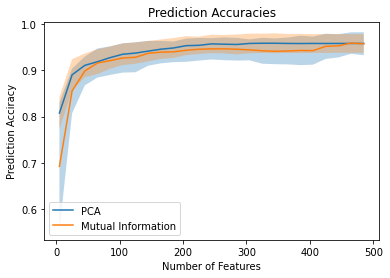

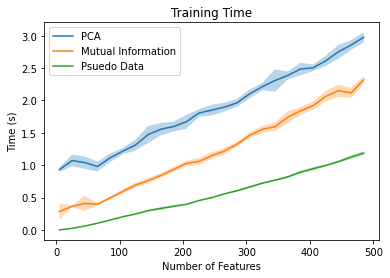

In [ ]:
# Plot prediction accuracies
fig, ax = plt.subplots()
ax.plot(num_features, pca_acc_mean, label= 'PCA')
ax.plot(num_features, ml_acc_mean, label = 'Mutual Information')
# ax.plot(num_features, psd_acc_mean, label = 'Psuedo Data')
ax.fill_between(num_features, ml_acc_mean+ml_acc_stds, ml_acc_mean-ml_acc_stds, alpha=0.3)
ax.fill_between(num_features, pca_acc_mean+pca_acc_stds, pca_acc_mean-pca_acc_stds, alpha=0.3)
# ax.fill_between(num_features, psd_acc_mean+psd_acc_stds, psd_acc_mean-psd_acc_stds, alpha=0.3)
ax.set(title="Prediction Accuracies", xlabel="Number of Features", ylabel="Prediction Acciracy")
plt.legend()
plt.show()

# Plot timing
fig, ax = plt.subplots()
ax.plot(num_features, pca_time_mean, label= 'PCA')
ax.fill_between(num_features, pca_time_mean+pca_time_stds, pca_time_mean-pca_time_stds, alpha=0.3)
ax.plot(num_features, ml_time_mean, label = 'Mutual Information')
ax.fill_between(num_features, ml_time_mean+ml_time_stds, ml_time_mean-ml_time_stds, alpha=0.3)
ax.plot(num_features, psd_time_mean, label = 'Psuedo Data')
ax.fill_between(num_features, psd_time_mean+psd_time_stds, psd_time_mean-psd_time_stds, alpha=0.3)
ax.set(title="Training Time", xlabel="Number of Features", ylabel="Time (s)")
plt.legend()
plt.show()

### Subsampled Data

In [7]:
def do_kfold_subsampled(model, x_data, y_data, num_points=100, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    
    np.random.seed(seed)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Get idxs of each label
        idx_1 = np.argwhere(combined_y[train_idx] == 1)[:,0]
        idx_2 = np.argwhere(combined_y[train_idx] == 2)[:,0]
        idx_3 = np.argwhere(combined_y[train_idx] == 3)[:,0]
        idx_4 = np.argwhere(combined_y[train_idx] == 4)[:,0]
        idx_5 = np.argwhere(combined_y[train_idx] == 5)[:,0]
        idx_6 = np.argwhere(combined_y[train_idx] == 6)[:,0]
        
        # Randomly sample num_points from each index
        idx1 = np.random.choice(idx_1, num_points)
        idx2 = np.random.choice(idx_2, num_points)
        idx3 = np.random.choice(idx_3, num_points)
        idx4 = np.random.choice(idx_4, num_points)
        idx5 = np.random.choice(idx_5, num_points)
        idx6 = np.random.choice(idx_6, num_points)
    
        # Sample data
        sampled_x1 = x_data[train_idx][idx1]
        sampled_x2 = x_data[train_idx][idx2]
        sampled_x3 = x_data[train_idx][idx3]
        sampled_x4 = x_data[train_idx][idx4]
        sampled_x5 = x_data[train_idx][idx5]
        sampled_x6 = x_data[train_idx][idx6]

        # Combine subsampled data
        sampled_combined = np.concatenate([sampled_x1, sampled_x2, sampled_x3, sampled_x4, sampled_x5, sampled_x6])

        # Get labels
        labels = np.ones(len(sampled_combined))
        for i in range(1,7):
            labels[(i-1)*num_points:(i)*num_points] *= i

        # Fit and time model
        start = time.time()
        model.fit(sampled_combined, labels)
        fit_times.append(time.time() - start)
        
        # Score model
        preds = model.predict(x_data[test_idx])
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} POINTS PREDICTION ACCURACY: {1:.3f} $\pm$ {2:.3f}".format(num_points, np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [49]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_subsampled(svm.SVC(kernel='linear', C=1), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/svm_linear_accuracy.npy", results)
np.save("./subsampled_results/svm_linear_time.npy", times)

(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.53it/s]


5 POINTS PREDICTION ACCURACY: 0.797 $\pm$ 0.034
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 10.03it/s]


25 POINTS PREDICTION ACCURACY: 0.879 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.94it/s]


45 POINTS PREDICTION ACCURACY: 0.907 $\pm$ 0.021
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.15it/s]


65 POINTS PREDICTION ACCURACY: 0.917 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  7.46it/s]


85 POINTS PREDICTION ACCURACY: 0.919 $\pm$ 0.029
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  6.81it/s]


105 POINTS PREDICTION ACCURACY: 0.924 $\pm$ 0.027
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  6.20it/s]


125 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.59it/s]


145 POINTS PREDICTION ACCURACY: 0.930 $\pm$ 0.033
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.16it/s]


165 POINTS PREDICTION ACCURACY: 0.928 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.86it/s]


185 POINTS PREDICTION ACCURACY: 0.938 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.58it/s]


205 POINTS PREDICTION ACCURACY: 0.934 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.25it/s]


225 POINTS PREDICTION ACCURACY: 0.940 $\pm$ 0.031
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.03it/s]


245 POINTS PREDICTION ACCURACY: 0.939 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.90it/s]


265 POINTS PREDICTION ACCURACY: 0.936 $\pm$ 0.029
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.63it/s]


285 POINTS PREDICTION ACCURACY: 0.942 $\pm$ 0.018
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.54it/s]


305 POINTS PREDICTION ACCURACY: 0.943 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


9it [00:02,  3.02it/s]


KeyboardInterrupt: ignored

In [ ]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

In [ ]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_subsampled(svm.SVC(kernel='poly', C=1), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/svm_poly_accuracy.npy", results)
np.save("./subsampled_results/svm_poly_time.npy", times)

(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 23.70it/s]


5 POINTS PREDICTION ACCURACY: 0.765 $\pm$ 0.030
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 14.85it/s]


25 POINTS PREDICTION ACCURACY: 0.869 $\pm$ 0.027
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 11.06it/s]


45 POINTS PREDICTION ACCURACY: 0.905 $\pm$ 0.021
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.93it/s]


65 POINTS PREDICTION ACCURACY: 0.909 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  7.61it/s]


85 POINTS PREDICTION ACCURACY: 0.925 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  6.54it/s]


105 POINTS PREDICTION ACCURACY: 0.927 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.77it/s]


125 POINTS PREDICTION ACCURACY: 0.937 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.11it/s]


145 POINTS PREDICTION ACCURACY: 0.930 $\pm$ 0.017
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.81it/s]


165 POINTS PREDICTION ACCURACY: 0.931 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.32it/s]


185 POINTS PREDICTION ACCURACY: 0.938 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.04it/s]


205 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.70it/s]


225 POINTS PREDICTION ACCURACY: 0.941 $\pm$ 0.032
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  3.29it/s]


245 POINTS PREDICTION ACCURACY: 0.936 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  3.12it/s]


265 POINTS PREDICTION ACCURACY: 0.939 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.98it/s]


285 POINTS PREDICTION ACCURACY: 0.941 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.89it/s]


305 POINTS PREDICTION ACCURACY: 0.943 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.67it/s]


325 POINTS PREDICTION ACCURACY: 0.941 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.56it/s]


345 POINTS PREDICTION ACCURACY: 0.947 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.44it/s]


365 POINTS PREDICTION ACCURACY: 0.944 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.31it/s]


385 POINTS PREDICTION ACCURACY: 0.945 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.19it/s]


405 POINTS PREDICTION ACCURACY: 0.946 $\pm$ 0.020
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.09it/s]


425 POINTS PREDICTION ACCURACY: 0.949 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.99it/s]


445 POINTS PREDICTION ACCURACY: 0.948 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.94it/s]


465 POINTS PREDICTION ACCURACY: 0.949 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.85it/s]

485 POINTS PREDICTION ACCURACY: 0.949 $\pm$ 0.022


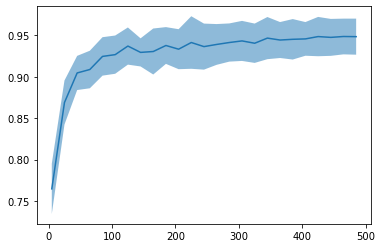

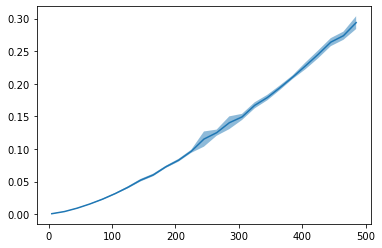

In [ ]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

In [ ]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_subsampled(LogisticRegression(multi_class='ovr', solver='liblinear'), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/lr_accuracy.npy", pred_accuracy)
np.save("./subsampled_results/lr_time.npy", fit_times)

(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 24.08it/s]


5 POINTS PREDICTION ACCURACY: 0.805 $\pm$ 0.033
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 16.00it/s]


25 POINTS PREDICTION ACCURACY: 0.884 $\pm$ 0.033
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 10.82it/s]


45 POINTS PREDICTION ACCURACY: 0.910 $\pm$ 0.024
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.06it/s]


65 POINTS PREDICTION ACCURACY: 0.917 $\pm$ 0.027
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  6.48it/s]


85 POINTS PREDICTION ACCURACY: 0.927 $\pm$ 0.027
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.12it/s]


105 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.52it/s]


125 POINTS PREDICTION ACCURACY: 0.934 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.97it/s]


145 POINTS PREDICTION ACCURACY: 0.934 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  3.48it/s]


165 POINTS PREDICTION ACCURACY: 0.932 $\pm$ 0.030
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.98it/s]


185 POINTS PREDICTION ACCURACY: 0.938 $\pm$ 0.029
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.66it/s]


205 POINTS PREDICTION ACCURACY: 0.939 $\pm$ 0.025
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.31it/s]


225 POINTS PREDICTION ACCURACY: 0.944 $\pm$ 0.034
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.27it/s]


245 POINTS PREDICTION ACCURACY: 0.940 $\pm$ 0.030
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.06it/s]


265 POINTS PREDICTION ACCURACY: 0.941 $\pm$ 0.032
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.91it/s]


285 POINTS PREDICTION ACCURACY: 0.946 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.76it/s]


305 POINTS PREDICTION ACCURACY: 0.949 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.69it/s]


325 POINTS PREDICTION ACCURACY: 0.945 $\pm$ 0.031
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:06,  1.61it/s]


345 POINTS PREDICTION ACCURACY: 0.950 $\pm$ 0.029
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:06,  1.53it/s]


365 POINTS PREDICTION ACCURACY: 0.951 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:06,  1.47it/s]


385 POINTS PREDICTION ACCURACY: 0.946 $\pm$ 0.028
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:07,  1.36it/s]


405 POINTS PREDICTION ACCURACY: 0.950 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:07,  1.32it/s]


425 POINTS PREDICTION ACCURACY: 0.951 $\pm$ 0.026
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:07,  1.25it/s]


445 POINTS PREDICTION ACCURACY: 0.952 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:08,  1.17it/s]


465 POINTS PREDICTION ACCURACY: 0.952 $\pm$ 0.023
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:08,  1.13it/s]

485 POINTS PREDICTION ACCURACY: 0.952 $\pm$ 0.025


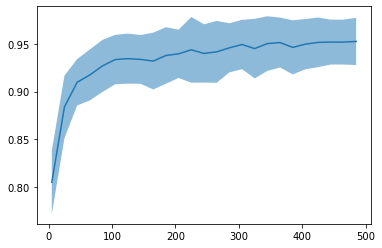

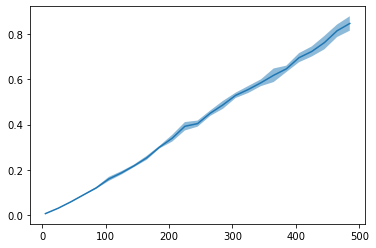

In [ ]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

In [ ]:
# Number of Psuedo data points
num_points =np.arange(5, 500, 20)

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_subsampled(RandomForestClassifier(), combined_x, combined_y, num_points=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/rf_accuracy.npy", pred_accuracy)
np.save("./subsampled_results/rf_time.npy", fit_times)

(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:00, 11.64it/s]


5 POINTS PREDICTION ACCURACY: 0.681 $\pm$ 0.045
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  8.09it/s]


25 POINTS PREDICTION ACCURACY: 0.860 $\pm$ 0.033
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:01,  5.73it/s]


45 POINTS PREDICTION ACCURACY: 0.877 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:02,  4.29it/s]


65 POINTS PREDICTION ACCURACY: 0.901 $\pm$ 0.022
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  3.32it/s]


85 POINTS PREDICTION ACCURACY: 0.908 $\pm$ 0.013
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:03,  2.70it/s]


105 POINTS PREDICTION ACCURACY: 0.912 $\pm$ 0.013
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:04,  2.15it/s]


125 POINTS PREDICTION ACCURACY: 0.911 $\pm$ 0.015
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:05,  1.84it/s]


145 POINTS PREDICTION ACCURACY: 0.919 $\pm$ 0.020
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:06,  1.53it/s]


165 POINTS PREDICTION ACCURACY: 0.909 $\pm$ 0.019
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:07,  1.41it/s]


185 POINTS PREDICTION ACCURACY: 0.921 $\pm$ 0.015
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:07,  1.26it/s]


205 POINTS PREDICTION ACCURACY: 0.923 $\pm$ 0.021
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


10it [00:08,  1.15it/s]


225 POINTS PREDICTION ACCURACY: 0.918 $\pm$ 0.017
(array([1., 2., 3., 4., 5., 6.]), array([1722, 1544, 1406, 1777, 1906, 1944]))


7it [00:06,  1.05it/s]

### Fractional Subsample

In [56]:
def do_kfold_frac_subsampled(model, x_data, y_data, sample_frac=0.1, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    np.random.seed(seed)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Sample idx
        sample_idx = np.random.choice(range(len(train_idx)), size=int(len(train_idx)*sample_frac))

        sampled_combined = x_data[train_idx][sample_idx]
        labels = y_data[train_idx][sample_idx]

        scalar = StandardScaler().fit(sampled_combined)
        standardized = scalar.transform(sampled_combined)

        # Fit and time model
        start = time.time()
        model.fit(standardized, labels)
        fit_times.append(time.time() - start)
        
        # Score model
        preds = model.predict(scalar.transform(x_data[test_idx]))
        score = accuracy_score(preds, y_data[test_idx])
        pred_accuracy.append(score)
        
    print(r"{0} FRAC  {1} POINTS PREDICTION ACCURACY: {2:.3f} $\pm$ {3:.3f}".format(sample_frac, len(sample_idx), np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

#### SVM Linear

In [57]:
# Number of Psuedo data points
num_points = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_frac_subsampled(svm.SVC(kernel='linear', C=1), combined_x, combined_y, sample_frac=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/svm_linear_accuracy.npy", results)
np.save("./subsampled_results/svm_linear_time.npy", times)

10it [00:00, 45.33it/s]


0.001 FRAC  9 POINTS PREDICTION ACCURACY: 0.490 $\pm$ 0.055


10it [00:00, 35.38it/s]


0.005 FRAC  46 POINTS PREDICTION ACCURACY: 0.732 $\pm$ 0.046


10it [00:00, 27.42it/s]


0.01 FRAC  92 POINTS PREDICTION ACCURACY: 0.838 $\pm$ 0.034


10it [00:00, 20.27it/s]


0.02 FRAC  185 POINTS PREDICTION ACCURACY: 0.872 $\pm$ 0.025


10it [00:00, 15.97it/s]


0.03 FRAC  278 POINTS PREDICTION ACCURACY: 0.889 $\pm$ 0.031


10it [00:00, 14.00it/s]


0.04 FRAC  370 POINTS PREDICTION ACCURACY: 0.894 $\pm$ 0.028


10it [00:00, 11.44it/s]


0.05 FRAC  463 POINTS PREDICTION ACCURACY: 0.898 $\pm$ 0.031


10it [00:01,  7.98it/s]


0.075 FRAC  695 POINTS PREDICTION ACCURACY: 0.911 $\pm$ 0.020


10it [00:01,  6.27it/s]


0.1 FRAC  927 POINTS PREDICTION ACCURACY: 0.918 $\pm$ 0.022


10it [00:01,  5.14it/s]


0.125 FRAC  1158 POINTS PREDICTION ACCURACY: 0.923 $\pm$ 0.030


10it [00:02,  4.35it/s]


0.15 FRAC  1390 POINTS PREDICTION ACCURACY: 0.930 $\pm$ 0.026


10it [00:02,  3.36it/s]


0.2 FRAC  1854 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.021


10it [00:03,  2.73it/s]


0.25 FRAC  2317 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.025


10it [00:04,  2.22it/s]


0.3 FRAC  2781 POINTS PREDICTION ACCURACY: 0.941 $\pm$ 0.027


10it [00:06,  1.55it/s]


0.4 FRAC  3708 POINTS PREDICTION ACCURACY: 0.946 $\pm$ 0.025


10it [00:08,  1.21it/s]

0.5 FRAC  4635 POINTS PREDICTION ACCURACY: 0.947 $\pm$ 0.020


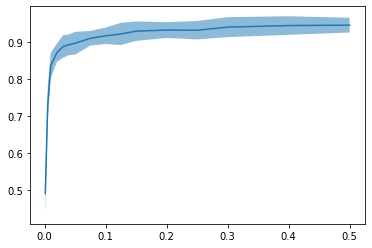

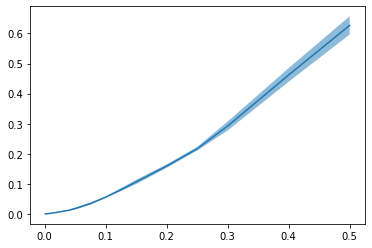

In [58]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

#### SVM Poly

In [59]:
# Number of Psuedo data points
num_points = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_frac_subsampled(svm.SVC(kernel='poly', C=1), combined_x, combined_y, sample_frac=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/svm_poly_accuracy.npy", results)
np.save("./subsampled_results/svm_poly_time.npy", times)

10it [00:00, 45.86it/s]


0.001 FRAC  9 POINTS PREDICTION ACCURACY: 0.338 $\pm$ 0.035


10it [00:00, 32.94it/s]


0.005 FRAC  46 POINTS PREDICTION ACCURACY: 0.453 $\pm$ 0.101


10it [00:00, 25.62it/s]


0.01 FRAC  92 POINTS PREDICTION ACCURACY: 0.585 $\pm$ 0.048


10it [00:00, 17.19it/s]


0.02 FRAC  185 POINTS PREDICTION ACCURACY: 0.666 $\pm$ 0.051


10it [00:00, 11.94it/s]


0.03 FRAC  278 POINTS PREDICTION ACCURACY: 0.727 $\pm$ 0.035


10it [00:01,  8.85it/s]


0.04 FRAC  370 POINTS PREDICTION ACCURACY: 0.764 $\pm$ 0.039


10it [00:01,  7.07it/s]


0.05 FRAC  463 POINTS PREDICTION ACCURACY: 0.807 $\pm$ 0.041


10it [00:02,  4.82it/s]


0.075 FRAC  695 POINTS PREDICTION ACCURACY: 0.845 $\pm$ 0.030


10it [00:02,  3.42it/s]


0.1 FRAC  927 POINTS PREDICTION ACCURACY: 0.872 $\pm$ 0.023


10it [00:03,  2.59it/s]


0.125 FRAC  1158 POINTS PREDICTION ACCURACY: 0.880 $\pm$ 0.028


10it [00:04,  2.14it/s]


0.15 FRAC  1390 POINTS PREDICTION ACCURACY: 0.890 $\pm$ 0.024


10it [00:06,  1.55it/s]


0.2 FRAC  1854 POINTS PREDICTION ACCURACY: 0.900 $\pm$ 0.022


10it [00:08,  1.18it/s]


0.25 FRAC  2317 POINTS PREDICTION ACCURACY: 0.906 $\pm$ 0.024


10it [00:10,  1.07s/it]


0.3 FRAC  2781 POINTS PREDICTION ACCURACY: 0.915 $\pm$ 0.024


10it [00:15,  1.55s/it]


0.4 FRAC  3708 POINTS PREDICTION ACCURACY: 0.921 $\pm$ 0.023


10it [00:20,  2.06s/it]

0.5 FRAC  4635 POINTS PREDICTION ACCURACY: 0.926 $\pm$ 0.022


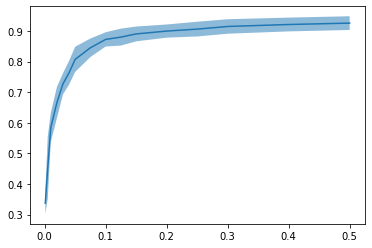

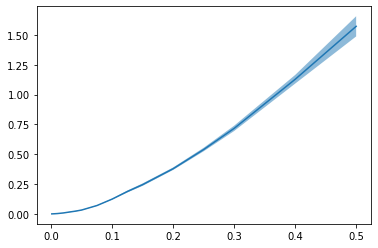

In [60]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

#### Logistic Regression

In [61]:
# Number of Psuedo data points
num_points = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_frac_subsampled(LogisticRegression(multi_class='ovr', solver='liblinear'), combined_x, combined_y, sample_frac=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/lr_accuracy.npy", results)
np.save("./subsampled_results/lr_time.npy", times)

10it [00:00, 34.33it/s]


0.001 FRAC  9 POINTS PREDICTION ACCURACY: 0.517 $\pm$ 0.066


10it [00:00, 15.93it/s]


0.005 FRAC  46 POINTS PREDICTION ACCURACY: 0.734 $\pm$ 0.056


10it [00:01,  9.92it/s]


0.01 FRAC  92 POINTS PREDICTION ACCURACY: 0.838 $\pm$ 0.022


10it [00:01,  5.84it/s]


0.02 FRAC  185 POINTS PREDICTION ACCURACY: 0.875 $\pm$ 0.022


10it [00:02,  4.10it/s]


0.03 FRAC  278 POINTS PREDICTION ACCURACY: 0.895 $\pm$ 0.033


10it [00:03,  3.13it/s]


0.04 FRAC  370 POINTS PREDICTION ACCURACY: 0.901 $\pm$ 0.033


10it [00:03,  2.59it/s]


0.05 FRAC  463 POINTS PREDICTION ACCURACY: 0.908 $\pm$ 0.028


10it [00:05,  1.75it/s]


0.075 FRAC  695 POINTS PREDICTION ACCURACY: 0.923 $\pm$ 0.019


10it [00:07,  1.29it/s]


0.1 FRAC  927 POINTS PREDICTION ACCURACY: 0.927 $\pm$ 0.027


10it [00:10,  1.09s/it]


0.125 FRAC  1158 POINTS PREDICTION ACCURACY: 0.936 $\pm$ 0.027


10it [00:14,  1.43s/it]


0.15 FRAC  1390 POINTS PREDICTION ACCURACY: 0.935 $\pm$ 0.027


10it [00:22,  2.25s/it]


0.2 FRAC  1854 POINTS PREDICTION ACCURACY: 0.942 $\pm$ 0.026


10it [00:31,  3.14s/it]


0.25 FRAC  2317 POINTS PREDICTION ACCURACY: 0.943 $\pm$ 0.025


10it [00:39,  3.98s/it]


0.3 FRAC  2781 POINTS PREDICTION ACCURACY: 0.947 $\pm$ 0.032


10it [00:55,  5.57s/it]


0.4 FRAC  3708 POINTS PREDICTION ACCURACY: 0.951 $\pm$ 0.026


10it [01:14,  7.47s/it]

0.5 FRAC  4635 POINTS PREDICTION ACCURACY: 0.952 $\pm$ 0.024


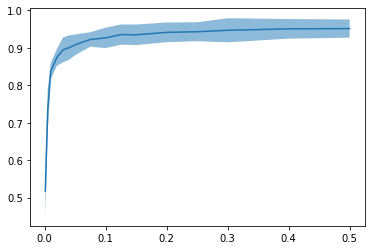

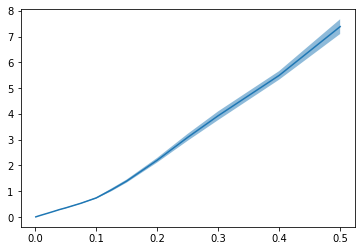

In [62]:
fig, ax = plt.subplots()
ax.plot(num_points, sub_acc_mean)
ax.fill_between(num_points, sub_acc_mean+sub_acc_stds, sub_acc_mean-sub_acc_stds, alpha=0.5)
plt.show()

fig, ax = plt.subplots()
ax.plot(num_points, sub_time_mean)
ax.fill_between(num_points, sub_time_mean+sub_time_stds, sub_time_mean-sub_time_stds, alpha=0.5)
plt.show()

#### Random Forest

In [63]:
# Number of Psuedo data points
num_points = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

results = []
times = []
for num in num_points:
    pred_accuracy, fit_times = do_kfold_frac_subsampled(RandomForestClassifier(), combined_x, combined_y, sample_frac=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/rf_accuracy.npy", results)
np.save("./subsampled_results/rf_time.npy", times)

10it [00:01,  5.28it/s]


0.001 FRAC  9 POINTS PREDICTION ACCURACY: 0.391 $\pm$ 0.046


10it [00:02,  4.84it/s]


0.005 FRAC  46 POINTS PREDICTION ACCURACY: 0.733 $\pm$ 0.072


10it [00:02,  4.25it/s]


0.01 FRAC  92 POINTS PREDICTION ACCURACY: 0.843 $\pm$ 0.042


10it [00:03,  3.26it/s]


0.02 FRAC  185 POINTS PREDICTION ACCURACY: 0.880 $\pm$ 0.023


10it [00:03,  2.50it/s]


0.03 FRAC  278 POINTS PREDICTION ACCURACY: 0.892 $\pm$ 0.024


10it [00:04,  2.02it/s]


0.04 FRAC  370 POINTS PREDICTION ACCURACY: 0.886 $\pm$ 0.020


10it [00:06,  1.67it/s]


0.05 FRAC  463 POINTS PREDICTION ACCURACY: 0.897 $\pm$ 0.015


10it [00:08,  1.14it/s]


0.075 FRAC  695 POINTS PREDICTION ACCURACY: 0.909 $\pm$ 0.014


10it [00:11,  1.18s/it]


0.1 FRAC  927 POINTS PREDICTION ACCURACY: 0.914 $\pm$ 0.014


10it [00:15,  1.51s/it]


0.125 FRAC  1158 POINTS PREDICTION ACCURACY: 0.917 $\pm$ 0.016


10it [00:18,  1.84s/it]


0.15 FRAC  1390 POINTS PREDICTION ACCURACY: 0.914 $\pm$ 0.014


10it [00:25,  2.54s/it]


0.2 FRAC  1854 POINTS PREDICTION ACCURACY: 0.919 $\pm$ 0.016


10it [00:32,  3.29s/it]


0.25 FRAC  2317 POINTS PREDICTION ACCURACY: 0.925 $\pm$ 0.012


10it [00:40,  4.07s/it]


0.3 FRAC  2781 POINTS PREDICTION ACCURACY: 0.925 $\pm$ 0.015


10it [00:56,  5.65s/it]


0.4 FRAC  3708 POINTS PREDICTION ACCURACY: 0.929 $\pm$ 0.015


10it [01:12,  7.27s/it]

0.5 FRAC  4635 POINTS PREDICTION ACCURACY: 0.932 $\pm$ 0.015


#### NN

In [64]:
def do_kfold_nn_frac_subsampled(model, x_data, y_data, sample_frac=0.1, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    np.random.seed(seed)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Sample idx
        sample_idx = np.random.choice(range(len(train_idx)), size=int(len(train_idx)*sample_frac))

        sampled_combined = x_data[train_idx][sample_idx].astype('float32')
        labels = y_data[train_idx][sample_idx]

        # Fit and time model
        start = time.time()
        print(labels.shape)
        model.fit(sampled_combined, labels, batch_size = 30, epochs = 5)

        fit_times.append(time.time() - start)
        
        # Score model
        #preds = model.predict(x_data[test_idx])
        #score = accuracy_score(preds, y_data[test_idx])
        loss, score = model.evaluate(x_data[test_idx], y_data[test_idx], verbose=0)
        pred_accuracy.append(score)
        
    print(r"{0} FRAC  {1} POINTS PREDICTION ACCURACY: {2:.3f} $\pm$ {3:.3f}".format(sample_frac, len(sample_idx), np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

In [65]:
# Number of Psuedo data points
num_points = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]

results = []
times = []
for num in num_points:
    model = Sequential()
    model.add(Dense(561, activation='relu', kernel_initializer='he_normal', input_shape=(561,)))
    model.add(Dense(384, activation='relu',  kernel_initializer='he_normal'))
    model.add(Dense(6,activation='softmax'))
        
    optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
        
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #model.fit(transformed, y_data[train_idx], batch_size = 30, epochs = 5)

    print(combined_x.shape)
    pred_accuracy, fit_times = do_kfold_nn_frac_subsampled(model, combined_x, combined_y-1, sample_frac=num)
    results.append(pred_accuracy)
    times.append(fit_times)
    
# Get means
sub_acc_mean = np.mean(results, axis=1)
sub_acc_stds = np.std(results, axis=1)
sub_time_mean = np.mean(times, axis=1)
sub_time_stds = np.std(times, axis=1)

np.save("./subsampled_results/nn_accuracy.npy", results)
np.save("./subsampled_results/nn_time.npy", times)

(10299, 561)


0it [00:00, ?it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 427ms/step - loss: 2.2715 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 1.2882 - accuracy: 0.5556
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.9715 - accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6142 - accuracy: 0.7778
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 0.3705 - accuracy: 0.8889


1it [00:00,  1.18it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 14ms/step - loss: 1.4982 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 0.7188 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 0.5234 - accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 0.5410 - accuracy: 0.7778
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 0.4052 - accuracy: 0.8889


2it [00:01,  1.84it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 9ms/step - loss: 2.5028 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 1.8732 - accuracy: 0.5556
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 1.3403 - accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.7932 - accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 0s 16ms/step - loss: 0.3391 - accuracy: 0.8889


3it [00:01,  2.07it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 11ms/step - loss: 1.2981 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 0.8814 - accuracy: 0.7778
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.7053 - accuracy: 0.5556
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 0.8584 - accuracy: 0.5556
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 0.7062 - accuracy: 0.5556


4it [00:02,  2.20it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 10ms/step - loss: 1.1269 - accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 1.0731 - accuracy: 0.5556
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.8268 - accuracy: 0.5556
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 0.5528 - accuracy: 0.7778
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 0.4798 - accuracy: 0.7778


5it [00:02,  2.37it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 10ms/step - loss: 0.7369 - accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.7778
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.3484 - accuracy: 0.8889
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 0.3309 - accuracy: 0.7778
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 0.3722 - accuracy: 0.8889


6it [00:02,  2.49it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 16ms/step - loss: 1.2635 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 0.8447 - accuracy: 0.7778
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 0.8483 - accuracy: 0.4444
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.4017 - accuracy: 0.7778
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 0.1458 - accuracy: 1.0000


7it [00:03,  2.54it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 9ms/step - loss: 1.8355 - accuracy: 0.5556
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 1.7846 - accuracy: 0.5556
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 1.3930 - accuracy: 0.5556
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.8571 - accuracy: 0.5556
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 0.4542 - accuracy: 0.7778


8it [00:03,  2.49it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 9ms/step - loss: 2.0936 - accuracy: 0.4444
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 1.2945 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.9981 - accuracy: 0.5556
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 0.7037 - accuracy: 0.4444
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 0.5135 - accuracy: 0.6667


9it [00:03,  2.56it/s]

(9,)
Epoch 1/5
1/1 [==============================] - 0s 12ms/step - loss: 1.8007 - accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 1.4259 - accuracy: 0.3333
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 0.7112 - accuracy: 0.8889
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.5243 - accuracy: 0.8889
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 0.5202 - accuracy: 0.8889


10it [00:04,  2.32it/s]


0.001 FRAC  9 POINTS PREDICTION ACCURACY: 0.510 $\pm$ 0.050
(10299, 561)


0it [00:00, ?it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 14ms/step - loss: 2.6399 - accuracy: 0.1304
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 1.5777 - accuracy: 0.3913
Epoch 3/5
2/2 [==============================] - 0s 9ms/step - loss: 1.0718 - accuracy: 0.6304
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 0.8355 - accuracy: 0.6304
Epoch 5/5
2/2 [==============================] - 0s 11ms/step - loss: 0.5522 - accuracy: 0.9130


1it [00:00,  1.10it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 11ms/step - loss: 0.7935 - accuracy: 0.5870
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.5783 - accuracy: 0.7826
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 0.6131 - accuracy: 0.8043
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4448 - accuracy: 0.8261
Epoch 5/5
2/2 [==============================] - 0s 12ms/step - loss: 0.4364 - accuracy: 0.8913


2it [00:01,  1.73it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4133 - accuracy: 0.8478
Epoch 2/5
2/2 [==============================] - 0s 12ms/step - loss: 0.3386 - accuracy: 0.8696
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3225 - accuracy: 0.8696
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 0.2721 - accuracy: 0.8261
Epoch 5/5
2/2 [==============================] - 0s 13ms/step - loss: 0.2216 - accuracy: 0.9130


3it [00:01,  2.07it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 12ms/step - loss: 0.5309 - accuracy: 0.7826
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4464 - accuracy: 0.8478
Epoch 3/5
2/2 [==============================] - 0s 14ms/step - loss: 0.3747 - accuracy: 0.8261
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3074 - accuracy: 0.9348
Epoch 5/5
2/2 [==============================] - 0s 12ms/step - loss: 0.2454 - accuracy: 0.9130


4it [00:01,  2.32it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3946 - accuracy: 0.7826
Epoch 2/5
2/2 [==============================] - 0s 12ms/step - loss: 0.4703 - accuracy: 0.8043
Epoch 3/5
2/2 [==============================] - 0s 9ms/step - loss: 0.3805 - accuracy: 0.9130
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 0.3380 - accuracy: 0.8261
Epoch 5/5
2/2 [==============================] - 0s 11ms/step - loss: 0.3471 - accuracy: 0.8043


5it [00:02,  2.40it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 11ms/step - loss: 0.3723 - accuracy: 0.8043
Epoch 2/5
2/2 [==============================] - 0s 11ms/step - loss: 0.3148 - accuracy: 0.8696
Epoch 3/5
2/2 [==============================] - 0s 16ms/step - loss: 0.3885 - accuracy: 0.8478
Epoch 4/5
2/2 [==============================] - 0s 12ms/step - loss: 0.2295 - accuracy: 0.9130
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 0.2358 - accuracy: 0.9130


6it [00:02,  2.42it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 13ms/step - loss: 0.2383 - accuracy: 0.8913
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.2308 - accuracy: 0.9130
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 0.1876 - accuracy: 0.9565
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 0.1598 - accuracy: 0.9783
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 0.1310 - accuracy: 0.9565


7it [00:03,  2.47it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 10ms/step - loss: 0.5561 - accuracy: 0.7174
Epoch 2/5
2/2 [==============================] - 0s 11ms/step - loss: 0.2843 - accuracy: 0.9130
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 0.3569 - accuracy: 0.8478
Epoch 4/5
2/2 [==============================] - 0s 11ms/step - loss: 0.3348 - accuracy: 0.8913
Epoch 5/5
2/2 [==============================] - 0s 11ms/step - loss: 0.2454 - accuracy: 0.8913


8it [00:03,  2.53it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 12ms/step - loss: 0.3930 - accuracy: 0.8043
Epoch 2/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3799 - accuracy: 0.8913
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3852 - accuracy: 0.8043
Epoch 4/5
2/2 [==============================] - 0s 10ms/step - loss: 0.4494 - accuracy: 0.8043
Epoch 5/5
2/2 [==============================] - 0s 10ms/step - loss: 0.3394 - accuracy: 0.8696


9it [00:03,  2.53it/s]

(46,)
Epoch 1/5
2/2 [==============================] - 0s 11ms/step - loss: 0.4152 - accuracy: 0.8043
Epoch 2/5
2/2 [==============================] - 0s 11ms/step - loss: 0.2993 - accuracy: 0.8913
Epoch 3/5
2/2 [==============================] - 0s 12ms/step - loss: 0.4378 - accuracy: 0.7391
Epoch 4/5
2/2 [==============================] - 0s 14ms/step - loss: 0.2422 - accuracy: 0.9130
Epoch 5/5
2/2 [==============================] - 0s 14ms/step - loss: 0.3717 - accuracy: 0.8696


10it [00:04,  2.30it/s]


0.005 FRAC  46 POINTS PREDICTION ACCURACY: 0.824 $\pm$ 0.087
(10299, 561)


0it [00:00, ?it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 7ms/step - loss: 1.9671 - accuracy: 0.2826
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 1.1952 - accuracy: 0.5543
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.7080 - accuracy: 0.7174
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.6293 - accuracy: 0.7174
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.5445 - accuracy: 0.8370


1it [00:01,  1.03s/it]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.5524 - accuracy: 0.7826
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.6266 - accuracy: 0.7609
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.6146 - accuracy: 0.8261
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3801 - accuracy: 0.8478
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.4925 - accuracy: 0.8370


2it [00:01,  1.44it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.7390 - accuracy: 0.7174
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.5316 - accuracy: 0.7391
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3520 - accuracy: 0.8370
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.4589 - accuracy: 0.8043
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.5612 - accuracy: 0.7500


3it [00:02,  1.58it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 10ms/step - loss: 0.4740 - accuracy: 0.7826
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.4507 - accuracy: 0.8043
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3935 - accuracy: 0.8152
Epoch 4/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2918 - accuracy: 0.8370
Epoch 5/5
4/4 [==============================] - 0s 8ms/step - loss: 0.2451 - accuracy: 0.9022


4it [00:02,  1.74it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 7ms/step - loss: 0.4480 - accuracy: 0.7283
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.4138 - accuracy: 0.8043
Epoch 3/5
4/4 [==============================] - 0s 7ms/step - loss: 0.3501 - accuracy: 0.8261
Epoch 4/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3444 - accuracy: 0.8152
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.3457 - accuracy: 0.8370


5it [00:02,  1.91it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.9239
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.1895 - accuracy: 0.9348
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.2181 - accuracy: 0.9130
Epoch 4/5
4/4 [==============================] - 0s 11ms/step - loss: 0.3287 - accuracy: 0.9022
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9239


6it [00:03,  1.91it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 7ms/step - loss: 0.4988 - accuracy: 0.7500
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3202 - accuracy: 0.8696
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.2554 - accuracy: 0.9022
Epoch 4/5
4/4 [==============================] - 0s 7ms/step - loss: 0.2690 - accuracy: 0.8696
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 0.5395 - accuracy: 0.8587


7it [00:03,  2.02it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 1.1844 - accuracy: 0.7500
Epoch 2/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3973 - accuracy: 0.8696
Epoch 3/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3673 - accuracy: 0.8261
Epoch 4/5
4/4 [==============================] - 0s 7ms/step - loss: 0.2334 - accuracy: 0.9022
Epoch 5/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2562 - accuracy: 0.9239


8it [00:04,  2.04it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 7ms/step - loss: 0.3630 - accuracy: 0.8043
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2765 - accuracy: 0.8696
Epoch 3/5
4/4 [==============================] - 0s 7ms/step - loss: 0.6130 - accuracy: 0.7826
Epoch 4/5
4/4 [==============================] - 0s 9ms/step - loss: 0.7439 - accuracy: 0.7174
Epoch 5/5
4/4 [==============================] - 0s 8ms/step - loss: 0.4757 - accuracy: 0.8261


9it [00:04,  2.10it/s]

(92,)
Epoch 1/5
4/4 [==============================] - 0s 8ms/step - loss: 0.6429 - accuracy: 0.7065
Epoch 2/5
4/4 [==============================] - 0s 9ms/step - loss: 0.2902 - accuracy: 0.8913
Epoch 3/5
4/4 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 0.8261
Epoch 4/5
4/4 [==============================] - 0s 7ms/step - loss: 0.4420 - accuracy: 0.8370
Epoch 5/5
4/4 [==============================] - 0s 8ms/step - loss: 0.3841 - accuracy: 0.8043


10it [00:05,  1.89it/s]

0.01 FRAC  92 POINTS PREDICTION ACCURACY: 0.796 $\pm$ 0.058


(10299, 561)


0it [00:00, ?it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 1.9910 - accuracy: 0.3459
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.8575 - accuracy: 0.5838
Epoch 3/5
7/7 [==============================] - 0s 8ms/step - loss: 0.5955 - accuracy: 0.7622
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.8378
Epoch 5/5
7/7 [==============================] - 0s 8ms/step - loss: 0.4828 - accuracy: 0.8216


1it [00:01,  1.07s/it]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.5741 - accuracy: 0.6919
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.5242 - accuracy: 0.7730
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.3576 - accuracy: 0.8432
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2894 - accuracy: 0.8649
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2866 - accuracy: 0.8595


2it [00:01,  1.34it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 9ms/step - loss: 0.4496 - accuracy: 0.8054
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8108
Epoch 3/5
7/7 [==============================] - 0s 8ms/step - loss: 0.4496 - accuracy: 0.8162
Epoch 4/5
7/7 [==============================] - 0s 8ms/step - loss: 0.3278 - accuracy: 0.8486
Epoch 5/5
7/7 [==============================] - 0s 9ms/step - loss: 0.3693 - accuracy: 0.8324


3it [00:02,  1.22it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.3716 - accuracy: 0.8162
Epoch 2/5
7/7 [==============================] - 0s 6ms/step - loss: 0.2224 - accuracy: 0.9189
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1848 - accuracy: 0.9297
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9459
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2129 - accuracy: 0.9135


4it [00:02,  1.45it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2940 - accuracy: 0.8649
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2541 - accuracy: 0.8919
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1938 - accuracy: 0.9081
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1731 - accuracy: 0.9243
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1538 - accuracy: 0.9405


5it [00:03,  1.57it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1844 - accuracy: 0.9297
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1998 - accuracy: 0.9189
Epoch 3/5
7/7 [==============================] - 0s 9ms/step - loss: 0.2190 - accuracy: 0.8919
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1862 - accuracy: 0.9189
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1428 - accuracy: 0.9459


6it [00:04,  1.68it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2343 - accuracy: 0.9081
Epoch 2/5
7/7 [==============================] - 0s 9ms/step - loss: 0.2491 - accuracy: 0.8973
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1437 - accuracy: 0.9568
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1515 - accuracy: 0.9297
Epoch 5/5
7/7 [==============================] - 0s 8ms/step - loss: 0.1074 - accuracy: 0.9676


7it [00:04,  1.75it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1415 - accuracy: 0.9405
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2043 - accuracy: 0.9027
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1550 - accuracy: 0.9351
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.0961 - accuracy: 0.9622
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.0765 - accuracy: 0.9784


8it [00:05,  1.77it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1965 - accuracy: 0.9027
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1958 - accuracy: 0.9243
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.3425 - accuracy: 0.8649
Epoch 4/5
7/7 [==============================] - 0s 6ms/step - loss: 0.1293 - accuracy: 0.9459
Epoch 5/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1608 - accuracy: 0.9351


9it [00:05,  1.82it/s]

(185,)
Epoch 1/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1983 - accuracy: 0.9135
Epoch 2/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1437 - accuracy: 0.9351
Epoch 3/5
7/7 [==============================] - 0s 7ms/step - loss: 0.1658 - accuracy: 0.9135
Epoch 4/5
7/7 [==============================] - 0s 7ms/step - loss: 0.2625 - accuracy: 0.8811
Epoch 5/5
7/7 [==============================] - 0s 8ms/step - loss: 0.1771 - accuracy: 0.9081


10it [00:06,  1.61it/s]


0.02 FRAC  185 POINTS PREDICTION ACCURACY: 0.880 $\pm$ 0.085
(10299, 561)


0it [00:00, ?it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 1.3447 - accuracy: 0.4892
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 0.6088 - accuracy: 0.7374
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.4259 - accuracy: 0.8165
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.3136 - accuracy: 0.8741
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2418 - accuracy: 0.9137


1it [00:01,  1.37s/it]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.3468 - accuracy: 0.8309
Epoch 2/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2727 - accuracy: 0.8957
Epoch 3/5
10/10 [==============================] - 0s 9ms/step - loss: 0.2832 - accuracy: 0.8525
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2795 - accuracy: 0.8741
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1500 - accuracy: 0.9532


2it [00:02,  1.05it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9388
Epoch 2/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2255 - accuracy: 0.8957
Epoch 3/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1773 - accuracy: 0.9281
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1764 - accuracy: 0.9173
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1137 - accuracy: 0.9496


3it [00:02,  1.11it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1788 - accuracy: 0.9245
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2955 - accuracy: 0.8705
Epoch 3/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2293 - accuracy: 0.8849
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1352 - accuracy: 0.9532
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.0834 - accuracy: 0.9784


4it [00:03,  1.14it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1816 - accuracy: 0.9245
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2178 - accuracy: 0.9137
Epoch 3/5
10/10 [==============================] - 0s 9ms/step - loss: 0.2722 - accuracy: 0.9065
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1418 - accuracy: 0.9460
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1153 - accuracy: 0.9496


5it [00:04,  1.24it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2082 - accuracy: 0.9065
Epoch 2/5
10/10 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.9281
Epoch 3/5
10/10 [==============================] - 0s 7ms/step - loss: 0.2049 - accuracy: 0.8957
Epoch 4/5
10/10 [==============================] - 0s 9ms/step - loss: 0.1824 - accuracy: 0.9173
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1161 - accuracy: 0.9604


6it [00:05,  1.22it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 9ms/step - loss: 0.2343 - accuracy: 0.9245
Epoch 2/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2701 - accuracy: 0.8849
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1350 - accuracy: 0.9532
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0646 - accuracy: 0.9820
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0762 - accuracy: 0.9748


7it [00:05,  1.27it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1456 - accuracy: 0.9317
Epoch 2/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2252 - accuracy: 0.9029
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0936 - accuracy: 0.9676
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.0785 - accuracy: 0.9712
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0728 - accuracy: 0.9748


8it [00:06,  1.25it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1370 - accuracy: 0.9388
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 0.0759 - accuracy: 0.9784
Epoch 3/5
10/10 [==============================] - 0s 7ms/step - loss: 0.0887 - accuracy: 0.9640
Epoch 4/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0483 - accuracy: 0.9856
Epoch 5/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1180 - accuracy: 0.9460


9it [00:07,  1.35it/s]

(278,)
Epoch 1/5
10/10 [==============================] - 0s 8ms/step - loss: 0.2460 - accuracy: 0.9101
Epoch 2/5
10/10 [==============================] - 0s 7ms/step - loss: 0.1557 - accuracy: 0.9317
Epoch 3/5
10/10 [==============================] - 0s 8ms/step - loss: 0.1610 - accuracy: 0.9317
Epoch 4/5
10/10 [==============================] - 0s 7ms/step - loss: 0.0802 - accuracy: 0.9676
Epoch 5/5
10/10 [==============================] - 0s 8ms/step - loss: 0.0960 - accuracy: 0.9532


10it [00:08,  1.23it/s]


0.03 FRAC  278 POINTS PREDICTION ACCURACY: 0.922 $\pm$ 0.038
(10299, 561)


0it [00:00, ?it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 7ms/step - loss: 1.2261 - accuracy: 0.5027
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.6393 - accuracy: 0.7378
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.3857 - accuracy: 0.8297
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.3052 - accuracy: 0.8757
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.2562 - accuracy: 0.9054


1it [00:01,  1.36s/it]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.3792 - accuracy: 0.8189
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.2268 - accuracy: 0.8946
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1842 - accuracy: 0.9243
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1371 - accuracy: 0.9378
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1068 - accuracy: 0.9676


2it [00:02,  1.02s/it]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1462 - accuracy: 0.9324
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1241 - accuracy: 0.9541
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1234 - accuracy: 0.9486
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1494 - accuracy: 0.9378
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.3154 - accuracy: 0.8973


3it [00:02,  1.11it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 7ms/step - loss: 0.2518 - accuracy: 0.9189
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1933 - accuracy: 0.9189
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1967 - accuracy: 0.9270
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1338 - accuracy: 0.9432
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1028 - accuracy: 0.9595


4it [00:03,  1.14it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1996 - accuracy: 0.9108
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1805 - accuracy: 0.9189
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1578 - accuracy: 0.9216
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1647 - accuracy: 0.9270
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1865 - accuracy: 0.9243


5it [00:04,  1.13it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.9081
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.2010 - accuracy: 0.9162
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1067 - accuracy: 0.9595
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1154 - accuracy: 0.9622
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0719 - accuracy: 0.9730


6it [00:05,  1.21it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1105 - accuracy: 0.9568
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0871 - accuracy: 0.9676
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1076 - accuracy: 0.9514
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1042 - accuracy: 0.9595
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.3060 - accuracy: 0.8811


7it [00:06,  1.17it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1628 - accuracy: 0.9162
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1606 - accuracy: 0.9270
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1065 - accuracy: 0.9541
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.1033 - accuracy: 0.9486
Epoch 5/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1140 - accuracy: 0.9541


8it [00:07,  1.20it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1050 - accuracy: 0.9514
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0880 - accuracy: 0.9568
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1092 - accuracy: 0.9486
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.0632 - accuracy: 0.9703
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0648 - accuracy: 0.9757


9it [00:07,  1.22it/s]

(370,)
Epoch 1/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1434 - accuracy: 0.9378
Epoch 2/5
13/13 [==============================] - 0s 8ms/step - loss: 0.1161 - accuracy: 0.9568
Epoch 3/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0913 - accuracy: 0.9757
Epoch 4/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0676 - accuracy: 0.9676
Epoch 5/5
13/13 [==============================] - 0s 7ms/step - loss: 0.0583 - accuracy: 0.9811


10it [00:08,  1.16it/s]


0.04 FRAC  370 POINTS PREDICTION ACCURACY: 0.906 $\pm$ 0.050
(10299, 561)


0it [00:00, ?it/s]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 7ms/step - loss: 1.1895 - accuracy: 0.5140
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 0.4950 - accuracy: 0.8143
Epoch 3/5
16/16 [==============================] - 0s 7ms/step - loss: 0.3408 - accuracy: 0.8596
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.2936 - accuracy: 0.8704
Epoch 5/5
16/16 [==============================] - 0s 7ms/step - loss: 0.2041 - accuracy: 0.9330


1it [00:01,  1.33s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 8ms/step - loss: 0.2422 - accuracy: 0.9050
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 0.2715 - accuracy: 0.8683
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1839 - accuracy: 0.9244
Epoch 4/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1749 - accuracy: 0.9244
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0965 - accuracy: 0.9719


2it [00:02,  1.08s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1720 - accuracy: 0.9352
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 0.2147 - accuracy: 0.9158
Epoch 3/5
16/16 [==============================] - 0s 9ms/step - loss: 0.2072 - accuracy: 0.8985
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.2727 - accuracy: 0.9071
Epoch 5/5
16/16 [==============================] - 0s 9ms/step - loss: 0.1478 - accuracy: 0.9460


3it [00:03,  1.01it/s]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 7ms/step - loss: 0.2519 - accuracy: 0.8855
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1777 - accuracy: 0.9330
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1263 - accuracy: 0.9525
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1351 - accuracy: 0.9438
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1064 - accuracy: 0.9568


4it [00:03,  1.08it/s]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1289 - accuracy: 0.9590
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1327 - accuracy: 0.9546
Epoch 3/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1434 - accuracy: 0.9330
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0818 - accuracy: 0.9654
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0691 - accuracy: 0.9719


5it [00:04,  1.09it/s]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1270 - accuracy: 0.9330
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1033 - accuracy: 0.9568
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1088 - accuracy: 0.9546
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1264 - accuracy: 0.9417
Epoch 5/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1653 - accuracy: 0.9330


6it [00:06,  1.13s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9417
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0941 - accuracy: 0.9633
Epoch 3/5
16/16 [==============================] - 0s 7ms/step - loss: 0.0979 - accuracy: 0.9568
Epoch 4/5
16/16 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 0.9741
Epoch 5/5
16/16 [==============================] - 0s 7ms/step - loss: 0.0515 - accuracy: 0.9806


7it [00:07,  1.03s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1492 - accuracy: 0.9374
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1618 - accuracy: 0.9352
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1659 - accuracy: 0.9374
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1324 - accuracy: 0.9460
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0999 - accuracy: 0.9611


8it [00:08,  1.01s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 9ms/step - loss: 0.1578 - accuracy: 0.9438
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0912 - accuracy: 0.9654
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1241 - accuracy: 0.9568
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1026 - accuracy: 0.9568
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0427 - accuracy: 0.9849


9it [00:09,  1.00s/it]

(463,)
Epoch 1/5
16/16 [==============================] - 0s 7ms/step - loss: 0.1090 - accuracy: 0.9698
Epoch 2/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1314 - accuracy: 0.9503
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 0.1059 - accuracy: 0.9525
Epoch 4/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0797 - accuracy: 0.9654
Epoch 5/5
16/16 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9827


10it [00:10,  1.01s/it]


0.05 FRAC  463 POINTS PREDICTION ACCURACY: 0.933 $\pm$ 0.032
(10299, 561)


0it [00:00, ?it/s]

(695,)
Epoch 1/5
24/24 [==============================] - 1s 8ms/step - loss: 1.0292 - accuracy: 0.6043
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.3558 - accuracy: 0.8691
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.2684 - accuracy: 0.8906
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1845 - accuracy: 0.9324
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.2451 - accuracy: 0.8978


1it [00:01,  1.67s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 7ms/step - loss: 0.2483 - accuracy: 0.9151
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1944 - accuracy: 0.9223
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1486 - accuracy: 0.9381
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1418 - accuracy: 0.9410
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1077 - accuracy: 0.9612


2it [00:02,  1.40s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 8ms/step - loss: 0.2055 - accuracy: 0.9165
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1441 - accuracy: 0.9367
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1255 - accuracy: 0.9482
Epoch 4/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1088 - accuracy: 0.9612
Epoch 5/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0796 - accuracy: 0.9741


3it [00:04,  1.46s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1550 - accuracy: 0.9367
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0938 - accuracy: 0.9597
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1025 - accuracy: 0.9568
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1082 - accuracy: 0.9540
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0879 - accuracy: 0.9640


4it [00:05,  1.34s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1623 - accuracy: 0.9353
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1522 - accuracy: 0.9396
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1126 - accuracy: 0.9554
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0765 - accuracy: 0.9727
Epoch 5/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0922 - accuracy: 0.9640


5it [00:06,  1.29s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1842 - accuracy: 0.9223
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1591 - accuracy: 0.9223
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0924 - accuracy: 0.9612
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1235 - accuracy: 0.9525
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0879 - accuracy: 0.9640


6it [00:07,  1.25s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0971 - accuracy: 0.9626
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.9669
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1341 - accuracy: 0.9468
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0548 - accuracy: 0.9842
Epoch 5/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0625 - accuracy: 0.9813


7it [00:09,  1.23s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1570 - accuracy: 0.9396
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0991 - accuracy: 0.9612
Epoch 3/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0807 - accuracy: 0.9727
Epoch 4/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0690 - accuracy: 0.9727
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.0536 - accuracy: 0.9827


8it [00:11,  1.44s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1363 - accuracy: 0.9439
Epoch 2/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.9338
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1280 - accuracy: 0.9583
Epoch 4/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1085 - accuracy: 0.9482
Epoch 5/5
24/24 [==============================] - 0s 7ms/step - loss: 0.0812 - accuracy: 0.9698


9it [00:12,  1.46s/it]

(695,)
Epoch 1/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1292 - accuracy: 0.9410
Epoch 2/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1909 - accuracy: 0.9295
Epoch 3/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1526 - accuracy: 0.9453
Epoch 4/5
24/24 [==============================] - 0s 7ms/step - loss: 0.1233 - accuracy: 0.9540
Epoch 5/5
24/24 [==============================] - 0s 8ms/step - loss: 0.1038 - accuracy: 0.9669


10it [00:13,  1.37s/it]

0.075 FRAC  695 POINTS PREDICTION ACCURACY: 0.939 $\pm$ 0.037


(10299, 561)


0it [00:00, ?it/s]

(926,)
Epoch 1/5
31/31 [==============================] - 1s 7ms/step - loss: 0.8035 - accuracy: 0.6749
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.2841 - accuracy: 0.8931
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.2836 - accuracy: 0.8877
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1858 - accuracy: 0.9244
Epoch 5/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1763 - accuracy: 0.9309


1it [00:01,  1.96s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 7ms/step - loss: 0.2085 - accuracy: 0.9233
Epoch 2/5
31/31 [==============================] - 0s 7ms/step - loss: 0.2237 - accuracy: 0.9006
Epoch 3/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1073 - accuracy: 0.9568
Epoch 4/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1437 - accuracy: 0.9428
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0812 - accuracy: 0.9665


2it [00:03,  1.67s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1440 - accuracy: 0.9406
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1328 - accuracy: 0.9460
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1150 - accuracy: 0.9579
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1018 - accuracy: 0.9644
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0946 - accuracy: 0.9633


3it [00:04,  1.56s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.9417
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1198 - accuracy: 0.9590
Epoch 3/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0882 - accuracy: 0.9687
Epoch 4/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0695 - accuracy: 0.9773
Epoch 5/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0586 - accuracy: 0.9795


4it [00:06,  1.53s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1211 - accuracy: 0.9482
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1093 - accuracy: 0.9644
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0913 - accuracy: 0.9665
Epoch 4/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1243 - accuracy: 0.9471
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0907 - accuracy: 0.9633


5it [00:07,  1.53s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1373 - accuracy: 0.9374
Epoch 2/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1055 - accuracy: 0.9568
Epoch 3/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0540 - accuracy: 0.9806
Epoch 4/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0485 - accuracy: 0.9827
Epoch 5/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0503 - accuracy: 0.9795


6it [00:09,  1.52s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1262 - accuracy: 0.9546
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0773 - accuracy: 0.9741
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1028 - accuracy: 0.9503
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0709 - accuracy: 0.9719
Epoch 5/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0680 - accuracy: 0.9730


7it [00:10,  1.51s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 7ms/step - loss: 0.1166 - accuracy: 0.9557
Epoch 2/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0648 - accuracy: 0.9730
Epoch 3/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0512 - accuracy: 0.9838
Epoch 4/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0516 - accuracy: 0.9816


8it [00:12,  1.52s/it]

(926,)
Epoch 1/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0786 - accuracy: 0.9676
Epoch 2/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0979 - accuracy: 0.9590
Epoch 3/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0803 - accuracy: 0.9730
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0724 - accuracy: 0.9687
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0567 - accuracy: 0.9762


9it [00:13,  1.49s/it]

(927,)
Epoch 1/5
31/31 [==============================] - 0s 8ms/step - loss: 0.1688 - accuracy: 0.9353
Epoch 2/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0853 - accuracy: 0.9655
Epoch 3/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.9838
Epoch 4/5
31/31 [==============================] - 0s 7ms/step - loss: 0.0413 - accuracy: 0.9838
Epoch 5/5
31/31 [==============================] - 0s 8ms/step - loss: 0.0485 - accuracy: 0.9773


10it [00:15,  1.53s/it]

0.1 FRAC  927 POINTS PREDICTION ACCURACY: 0.938 $\pm$ 0.037


(10299, 561)


0it [00:00, ?it/s]

(1158,)
Epoch 1/5
39/39 [==============================] - 1s 8ms/step - loss: 0.7778 - accuracy: 0.6710
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.2942 - accuracy: 0.8834
Epoch 3/5
39/39 [==============================] - 0s 8ms/step - loss: 0.2166 - accuracy: 0.9128
Epoch 4/5
39/39 [==============================] - 0s 8ms/step - loss: 0.2326 - accuracy: 0.9016
Epoch 5/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1324 - accuracy: 0.9473


1it [00:02,  2.28s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1908 - accuracy: 0.9197
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1120 - accuracy: 0.9516
Epoch 3/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1107 - accuracy: 0.9594
Epoch 4/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0724 - accuracy: 0.9767
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0744 - accuracy: 0.9698


2it [00:04,  2.01s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1926 - accuracy: 0.9249
Epoch 2/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1219 - accuracy: 0.9465
Epoch 3/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1258 - accuracy: 0.9465
Epoch 4/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1191 - accuracy: 0.9534
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0870 - accuracy: 0.9637


3it [00:06,  2.38s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1186 - accuracy: 0.9542
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1046 - accuracy: 0.9646
Epoch 3/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0801 - accuracy: 0.9680
Epoch 4/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.9724
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0738 - accuracy: 0.9689


4it [00:08,  2.15s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1297 - accuracy: 0.9413
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9680
Epoch 3/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1235 - accuracy: 0.9499
Epoch 4/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1045 - accuracy: 0.9655
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0798 - accuracy: 0.9594


5it [00:10,  2.00s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1130 - accuracy: 0.9568
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0896 - accuracy: 0.9672
Epoch 3/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1369 - accuracy: 0.9387
Epoch 4/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1055 - accuracy: 0.9629
Epoch 5/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0780 - accuracy: 0.9698


6it [00:12,  1.89s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1152 - accuracy: 0.9560
Epoch 2/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0639 - accuracy: 0.9741
Epoch 3/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0612 - accuracy: 0.9750
Epoch 4/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0539 - accuracy: 0.9801
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0745 - accuracy: 0.9732


7it [00:13,  1.84s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1688 - accuracy: 0.9430
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1164 - accuracy: 0.9499
Epoch 3/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0917 - accuracy: 0.9603
Epoch 4/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.9801
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0494 - accuracy: 0.9819


8it [00:15,  1.82s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0831 - accuracy: 0.9629
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0682 - accuracy: 0.9767
Epoch 3/5
39/39 [==============================] - 0s 7ms/step - loss: 0.0685 - accuracy: 0.9698
Epoch 4/5
39/39 [==============================] - 0s 8ms/step - loss: 0.1303 - accuracy: 0.9465
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0532 - accuracy: 0.9845


9it [00:17,  1.81s/it]

(1158,)
Epoch 1/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0942 - accuracy: 0.9646
Epoch 2/5
39/39 [==============================] - 0s 7ms/step - loss: 0.1438 - accuracy: 0.9491
Epoch 3/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0660 - accuracy: 0.9784
Epoch 4/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0496 - accuracy: 0.9810
Epoch 5/5
39/39 [==============================] - 0s 8ms/step - loss: 0.0520 - accuracy: 0.9767


10it [00:19,  1.93s/it]


0.125 FRAC  1158 POINTS PREDICTION ACCURACY: 0.942 $\pm$ 0.032
(10299, 561)


0it [00:00, ?it/s]

(1390,)
Epoch 1/5
47/47 [==============================] - 1s 8ms/step - loss: 0.7434 - accuracy: 0.7122
Epoch 2/5
47/47 [==============================] - 0s 8ms/step - loss: 0.2700 - accuracy: 0.8914
Epoch 3/5
47/47 [==============================] - 0s 8ms/step - loss: 0.2189 - accuracy: 0.9043
Epoch 4/5
36/47 [=====================>........] - ETA: 0s - loss: 0.1394 - accuracy: 0.9398

0it [00:01, ?it/s]


KeyboardInterrupt: ignored

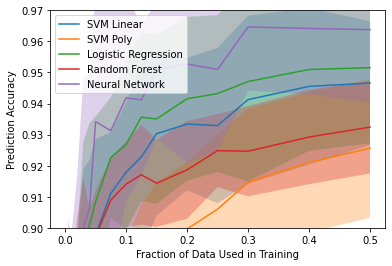

In [66]:
svm_lin = np.load("./subsampled_results/svm_linear_accuracy.npy")
lin_mean = np.mean(svm_lin, axis=1)
lin_std = np.std(svm_lin, axis=1)

svm_poly = np.load("./subsampled_results/svm_poly_accuracy.npy")
poly_mean = np.mean(svm_poly, axis=1)
poly_std = np.std(svm_poly, axis=1)

lr = np.load("./subsampled_results/lr_accuracy.npy")
lr_mean = np.mean(lr, axis=1)
lr_std = np.std(lr, axis=1)

rf = np.load("./subsampled_results/rf_accuracy.npy")
rf_mean = np.mean(rf, axis=1)
rf_std = np.std(rf, axis=1)

nn = np.load("./subsampled_results/nn_accuracy.npy")
nn_mean = np.mean(nn, axis=1)
nn_std = np.std(nn, axis=1)


fig, ax = plt.subplots()
ax.plot(num_points, lin_mean, label="SVM Linear")
ax.fill_between(num_points, lin_mean+lin_std, lin_mean-lin_std, alpha=0.3)

ax.plot(num_points, poly_mean, label="SVM Poly")
ax.fill_between(num_points, poly_mean+poly_std, poly_mean-poly_std, alpha=0.3)

ax.plot(num_points, np.mean(lr, axis=1), label="Logistic Regression")
ax.fill_between(num_points, lr_mean+lr_std, lr_mean-lr_std, alpha=0.3)

ax.plot(num_points, np.mean(rf, axis=1), label="Random Forest")
ax.fill_between(num_points, rf_mean+rf_std, rf_mean-rf_std, alpha=0.3)

ax.plot(num_points, np.mean(nn, axis=1), label="Neural Network")
ax.fill_between(num_points, nn_mean+nn_std, nn_mean-nn_std, alpha=0.3)

ax.set(ylim=(0.9, 0.97))
ax.legend(loc='best')
ax.set(xlabel="Fraction of Data Used in Training", ylabel="Prediction Accuracy")
plt.show()

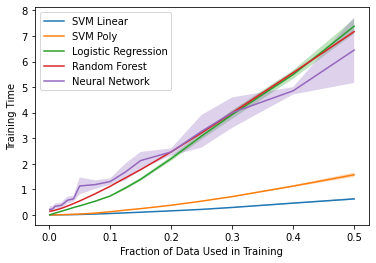

In [67]:
svm_lin = np.load("./subsampled_results/svm_linear_time.npy")
lin_mean = np.mean(svm_lin, axis=1)
lin_std = np.std(svm_lin, axis=1)

svm_poly = np.load("./subsampled_results/svm_poly_time.npy")
poly_mean = np.mean(svm_poly, axis=1)
poly_std = np.std(svm_poly, axis=1)

lr = np.load("./subsampled_results/lr_time.npy")
lr_mean = np.mean(lr, axis=1)
lr_std = np.std(lr, axis=1)

rf = np.load("./subsampled_results/rf_time.npy")
rf_mean = np.mean(rf, axis=1)
rf_std = np.std(rf, axis=1)

nn = np.load("./subsampled_results/nn_time.npy")
nn_mean = np.mean(nn, axis=1)
nn_std = np.std(nn, axis=1)


fig, ax = plt.subplots()
ax.plot(num_points, lin_mean, label="SVM Linear")
ax.fill_between(num_points, lin_mean+lin_std, lin_mean-lin_std, alpha=0.3)

ax.plot(num_points, poly_mean, label="SVM Poly")
ax.fill_between(num_points, poly_mean+poly_std, poly_mean-poly_std, alpha=0.3)

ax.plot(num_points, np.mean(lr, axis=1), label="Logistic Regression")
ax.fill_between(num_points, lr_mean+lr_std, lr_mean-lr_std, alpha=0.3)

ax.plot(num_points, np.mean(rf, axis=1), label="Random Forest")
ax.fill_between(num_points, rf_mean+rf_std, rf_mean-rf_std, alpha=0.3)

ax.plot(num_points, np.mean(nn, axis=1), label="Neural Network")
ax.fill_between(num_points, nn_mean+nn_std, nn_mean-nn_std, alpha=0.3)

ax.legend(loc='best')
ax.set(xlabel="Fraction of Data Used in Training", ylabel="Training Time")
plt.show()

#### Plot for 'Ideal' Parameters

<ErrorbarContainer object of 3 artists>

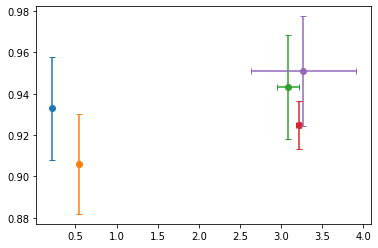

In [68]:
svm_lin = np.load("./subsampled_results/svm_linear_accuracy.npy")
lin_mean = np.mean(svm_lin, axis=1)
lin_std = np.std(svm_lin, axis=1)

svm_poly = np.load("./subsampled_results/svm_poly_accuracy.npy")
poly_mean = np.mean(svm_poly, axis=1)
poly_std = np.std(svm_poly, axis=1)

lr = np.load("./subsampled_results/lr_accuracy.npy")
lr_mean = np.mean(lr, axis=1)
lr_std = np.std(lr, axis=1)

rf = np.load("./subsampled_results/rf_accuracy.npy")
rf_mean = np.mean(rf, axis=1)
rf_std = np.std(rf, axis=1)

nn = np.load("./subsampled_results/nn_accuracy.npy")
nn_mean = np.mean(nn, axis=1)
nn_std = np.std(nn, axis=1)

svm_lintime = np.load("./subsampled_results/svm_linear_time.npy")
lin_meantime = np.mean(svm_lintime, axis=1)
lin_stdtime = np.std(svm_lintime, axis=1)

svm_polytime = np.load("./subsampled_results/svm_poly_time.npy")
poly_meantime = np.mean(svm_polytime, axis=1)
poly_stdtime = np.std(svm_polytime, axis=1)

lrtime = np.load("./subsampled_results/lr_time.npy")
lr_meantime = np.mean(lrtime, axis=1)
lr_stdtime = np.std(lrtime, axis=1)

rftime = np.load("./subsampled_results/rf_time.npy")
rf_meantime = np.mean(rftime, axis=1)
rf_stdtime = np.std(rftime, axis=1)

nntime = np.load("./subsampled_results/nn_time.npy")
nn_meantime = np.mean(nntime, axis=1)
nn_stdtime = np.std(nntime, axis=1)

best_idx = np.where(np.array(num_points)==0.25)
fig, ax = plt.subplots()
ax.scatter(lin_meantime[best_idx], lin_mean[best_idx])
ax.errorbar(lin_meantime[best_idx], lin_mean[best_idx], xerr=lin_stdtime[best_idx], yerr=lin_std[best_idx], capsize=3, fmt="none")

ax.scatter(poly_meantime[best_idx], poly_mean[best_idx])
ax.errorbar(poly_meantime[best_idx], poly_mean[best_idx], xerr=poly_stdtime[best_idx], yerr=poly_std[best_idx], capsize=3, fmt="none")

ax.scatter(lr_meantime[best_idx], lr_mean[best_idx])
ax.errorbar(lr_meantime[best_idx], lr_mean[best_idx], xerr=lr_stdtime[best_idx], yerr=lr_std[best_idx], capsize=3, fmt="none")

ax.scatter(rf_meantime[best_idx], rf_mean[best_idx])
ax.errorbar(rf_meantime[best_idx], rf_mean[best_idx], xerr=rf_stdtime[best_idx], yerr=rf_std[best_idx], capsize=3, fmt="none")

ax.scatter(nn_meantime[best_idx], nn_mean[best_idx])
ax.errorbar(nn_meantime[best_idx], nn_mean[best_idx], xerr=nn_stdtime[best_idx], yerr=nn_std[best_idx], capsize=3, fmt="none")

### Subsampled with PCA

In [ ]:
def do_kfold_nn_frac_subsampled(model, x_data, y_data, sample_frac=0.1, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    np.random.seed(seed)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Sample idx
        sample_idx = np.random.choice(range(len(train_idx)), size=int(len(train_idx)*sample_frac))

        sampled_combined = x_data[train_idx][sample_idx].astype('float32')
        labels = y_data[train_idx][sample_idx]

        # Do PCA
        features = x_data.shape[1] if(features == 'all') else features
        pca = PCA(n_components=features)
        scalar = StandardScaler().fit(sampled_combined)
        standardized = scalar.transform(sampled_combined)
        transformed = pca.fit_transform(standardized)
        
        # Fit and time model
        start = time.time()
        model.fit(transformed, y_data[train_idx])
        fit_times.append(time.time() - start)

        # Fit and time model
        start = time.time()
        print(labels.shape)
        model.fit(sampled_combined, labels, batch_size = 30, epochs = 5)

        fit_times.append(time.time() - start)
        
        # Score model
        #preds = model.predict(x_data[test_idx])
        #score = accuracy_score(preds, y_data[test_idx])
        loss, score = model.evaluate(x_data[test_idx], y_data[test_idx], verbose=0)
        pred_accuracy.append(score)
        
    print(r"{0} FRAC  {1} POINTS PREDICTION ACCURACY: {2:.3f} $\pm$ {3:.3f}".format(sample_frac, len(sample_idx), np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

### Subsampled with MI

In [ ]:
def do_kfold_nn_frac_subsampled(model, x_data, y_data, sample_frac=0.1, folds=10, seed=1):
         
    # Do KFold
    kf = KFold(folds)
    np.random.seed(seed)
    
    # KF training
    pred_accuracy = []
    fit_times = []
    for idx, (train_idx, test_idx) in tqdm(enumerate(kf.split(list(range(len(y_data)))))): 
        
        # Sample idx
        sample_idx = np.random.choice(range(len(train_idx)), size=int(len(train_idx)*sample_frac))

        sampled_combined = x_data[train_idx][sample_idx].astype('float32')
        labels = y_data[train_idx][sample_idx]

        # Fit and time model
        start = time.time()
        print(labels.shape)
        model.fit(sampled_combined, labels, batch_size = 30, epochs = 5)

        fit_times.append(time.time() - start)
        
        # Score model
        #preds = model.predict(x_data[test_idx])
        #score = accuracy_score(preds, y_data[test_idx])
        loss, score = model.evaluate(x_data[test_idx], y_data[test_idx], verbose=0)
        pred_accuracy.append(score)
        
    print(r"{0} FRAC  {1} POINTS PREDICTION ACCURACY: {2:.3f} $\pm$ {3:.3f}".format(sample_frac, len(sample_idx), np.mean(pred_accuracy), np.std(pred_accuracy)))
    return pred_accuracy, fit_times

## Part 3
- Identify the optimal number of features using feature engineering technique based on time and accuracy. 

In [ ]:
err = 0.003
#For PCA
for i in range (0,len(num_features)):
    if pca_acc_mean[i+1] - pca_acc_mean[i] <= err:
        PCA_f = i
        print(f'For {num_features[i]}, the accuracy is {pca_acc_mean[i]}')
        break
        
# For MI
for j in range (0,len(num_features)):
    if ml_acc_mean[j+1] - ml_acc_mean[j] <= err:
        MI_f = j
        print(f'For {num_features[j]}, the accuracy is {ml_acc_mean[j]}')
        break

For 105, the accuracy is 0.934946550048591
For 105, the accuracy is 0.9268894298357347


### From our results above, PCA generates the best accuracy for the same number of features. However, based on the time plot, MI takes less time to run than PCA.  

In [ ]:
pred_accuracy, fit_times = do_kfold_pca(svm.SVC(kernel='linear', C=1), combined_x, combined_y, features= num_features[PCA_f])
pred_accuracy
fit_times

10it [00:17,  1.74s/it]

105 FEATURES PREDICTION ACCURACY: 0.934 $\pm$ 0.022


[1.1279826164245605,
 1.0940730571746826,
 1.1459345817565918,
 1.3065049648284912,
 1.216745138168335,
 1.5069680213928223,
 1.2835659980773926,
 1.1728627681732178,
 1.1190056800842285,
 1.1449368000030518]